## 04. [14032024] Cloning Quasars

* Download the SDSS quasara data
* Upsample this distribution in two ways, using both rejection sampling and inverse transform.
* Check, at least visually, that the two cloned distribitions are indeed similar to the observed one (for a quantitative check, come back to this point in a few lectures) (Hint: scipy.stats is your best friend)
* Think about the cosmology of quasars. How do you think they are distributed? Overplot the theorethical distribution to the measured SDSS data (Hint: astropy.cosmology is another close friend).
The best-fit cosmological model from the Planck data is:

`import astropy` \
`astropy.cosmology.Planck15`

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats, interpolate
from astropy.visualization import hist
from astroML.density_estimation import EmpiricalDistribution
from astroML.datasets import fetch_dr7_quasar

5.4135 0.0802


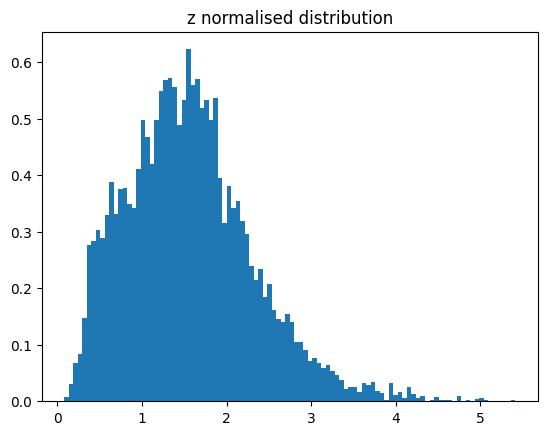

(100,) [0.0802     0.133533   0.186866   0.240199   0.29353198 0.346865
 0.40019798 0.453531   0.506864   0.560197   0.61353    0.66686296
 0.720196   0.773529   0.826862   0.88019496 0.93352795 0.986861
 1.0401939  1.093527   1.14686    1.2001929  1.253526   1.306859
 1.360192   1.413525   1.4668579  1.520191   1.573524   1.6268569
 1.68019    1.7335229  1.7868559  1.840189   1.8935219  1.946855
 2.0001879  2.053521   2.106854   2.160187   2.21352    2.2668529
 2.320186   2.373519   2.426852   2.480185   2.5335178  2.586851
 2.640184   2.693517   2.74685    2.8001828  2.8535159  2.906849
 2.960182   3.013515   3.0668478  3.1201808  3.173514   3.226847
 3.28018    3.3335128  3.3868458  3.4401789  3.493512   3.546845
 3.600178   3.6535108  3.7068439  3.760177   3.81351    3.866843
 3.9201758  3.9735088  4.0268416  4.080175   4.1335077  4.186841
 4.240174   4.293507   4.34684    4.4001727  4.453506   4.506839
 4.560172   4.613505   4.6668377  4.720171   4.773504   4.826837
 4.88017    4.

In [25]:
# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

z = data['redshift']

print(np.max(z), np.min(z))

plt.hist(z, bins=100, density=True)
counts, bins = np.histogram(z, bins=100, density=True)
plt.title ("z normalised distribution")
plt.show()

print(counts.shape, bins)

### Rejection Sampling

In [32]:
N = 1000

ymax = 0.65
x = np.random.uniform(0, 5.5, N)
y = np.random.uniform(0, ymax, N)

#goodpoints = x[y<counts[x<bins]]

goodpoints = []
for i in range(counts.size):
    goodpoints.append(x[y<counts[i]])

for i in range(
#print(goodpoints) in questo modo ho una lista di array contenenti i valori di x salvati per ogni bin
# non posso farne l'istogrammaaaaaaa